# Importing Libraries And Reading Dataset

In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split

In [127]:
cars = pd.read_csv("D:/car_price/car_price/quikr_car.csv")

In [128]:
cars.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


# Basic Info Of Dataset

In [129]:
cars.shape

(892, 6)

In [130]:
petcentage_of_null_data=(cars.isnull().sum())/len(cars)*100
petcentage_of_null_data

name          0.000000
company       0.000000
year          0.000000
Price         0.000000
kms_driven    5.829596
fuel_type     6.165919
dtype: float64

In [131]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


# Data Cleaning And Changing Datatype 

## Year Column

In [132]:
cars= cars[cars.year.str.isnumeric()]

In [133]:
cars['year'] = pd.to_numeric(cars['year'])

# Age Column Creating New

In [134]:
date_time=datetime.datetime.now()

In [135]:
cars['Age']=date_time.year-cars['year']

In [136]:
cars.head()

,name,company,year,Price,kms_driven,fuel_type,Age
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol,16
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel,17
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol,5
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol,9
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel,9


## Price Column

In [138]:
cars= cars[~(cars['Price']=='Ask For Price')]

In [139]:
cars['Price'] = cars['Price'].str.replace(',','').astype(int)
cars.head()

,name,company,year,Price,kms_driven,fuel_type,Age
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,"45,000 kms",Petrol,16
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40 kms,Diesel,17
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,"28,000 kms",Petrol,9
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,"36,000 kms",Diesel,9
6,Ford Figo,Ford,2012,175000,"41,000 kms",Diesel,11


In [140]:
cars.shape

(819, 7)

## Kms_driven Column

In [141]:
cars['kms_driven']= cars['kms_driven'].str.split().str.get(0).str.replace(',','')

In [142]:
cars= cars[cars['kms_driven'].str.isnumeric()]

In [143]:
cars['kms_driven']= pd.to_numeric(cars['kms_driven'])

In [144]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int64 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int64 
 5   fuel_type   816 non-null    object
 6   Age         817 non-null    int64 
dtypes: int32(1), int64(3), object(3)
memory usage: 47.9+ KB


In [145]:
cars['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [146]:
cars.dropna(axis=0,inplace=True)

In [147]:
cars.shape

(816, 7)

In [148]:
cars['name'] = cars['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [149]:
cars.head()

,name,company,year,Price,kms_driven,fuel_type,Age
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol,16
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel,17
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol,9
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel,9
6,Ford Figo,Ford,2012,175000,41000,Diesel,11


In [150]:
cars= cars.reset_index(drop=True)

In [151]:
cars.head()

,name,company,year,Price,kms_driven,fuel_type,Age
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol,16
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel,17
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol,9
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel,9
4,Ford Figo,Ford,2012,175000,41000,Diesel,11


In [152]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
 6   Age         816 non-null    int64 
dtypes: int32(1), int64(3), object(3)
memory usage: 41.6+ KB


In [153]:
cars.describe()

,year,Price,kms_driven,Age
count,816.000000,8.160000e+02,816.000000,816.000000
mean,2012.444853,4.117176e+05,46275.531863,10.555147
std,4.002992,4.751844e+05,34297.428044,4.002992
min,1995.000000,3.000000e+04,0.000000,4.000000
25%,2010.000000,1.750000e+05,27000.000000,8.000000
50%,2013.000000,2.999990e+05,41000.000000,10.000000
75%,2015.000000,4.912500e+05,56818.500000,13.000000
max,2019.000000,8.500003e+06,400000.000000,28.000000


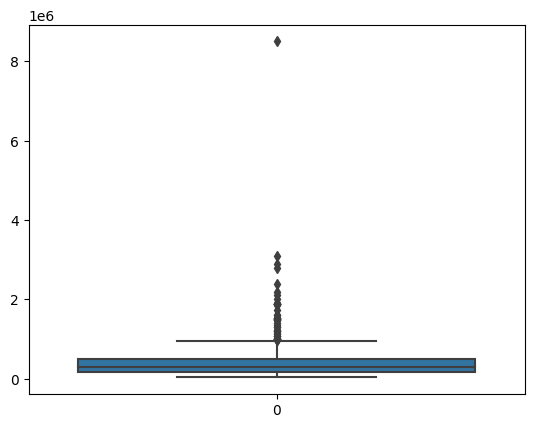

In [154]:
sns.boxplot(cars.Price)
plt.show()

In [155]:
cars= cars[~(cars['Price']>5e6)]

# Checking relationship of Company with Price

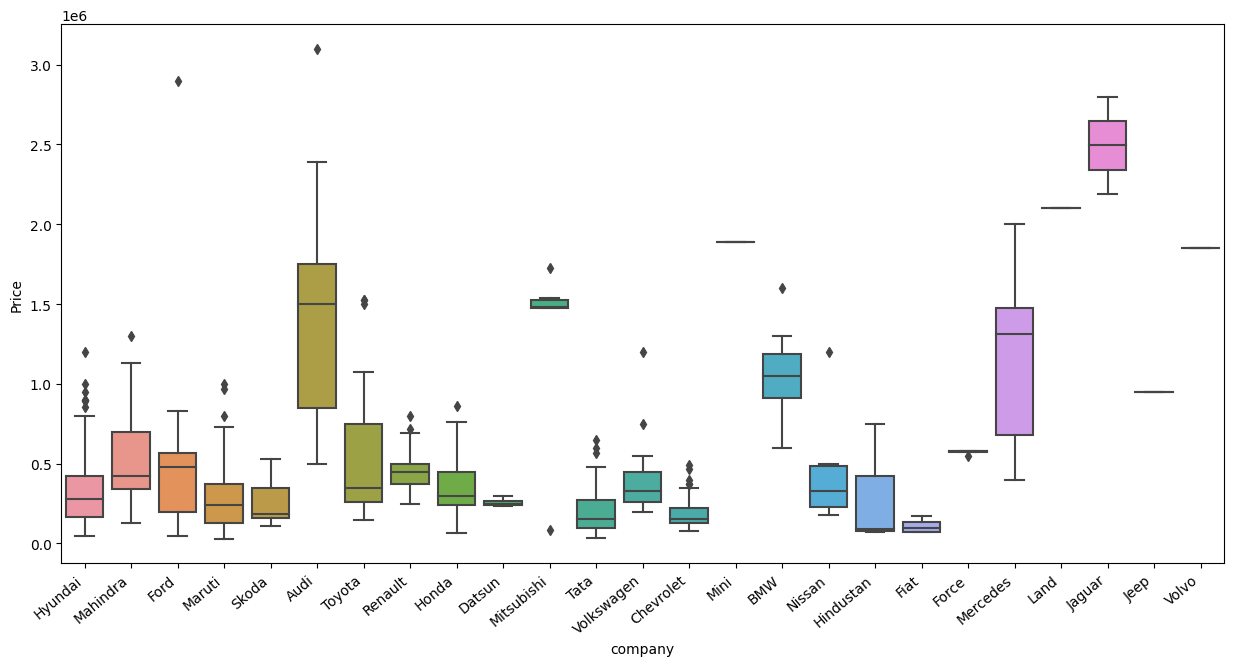

In [156]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=cars)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

# Checking relationship of Year with Price

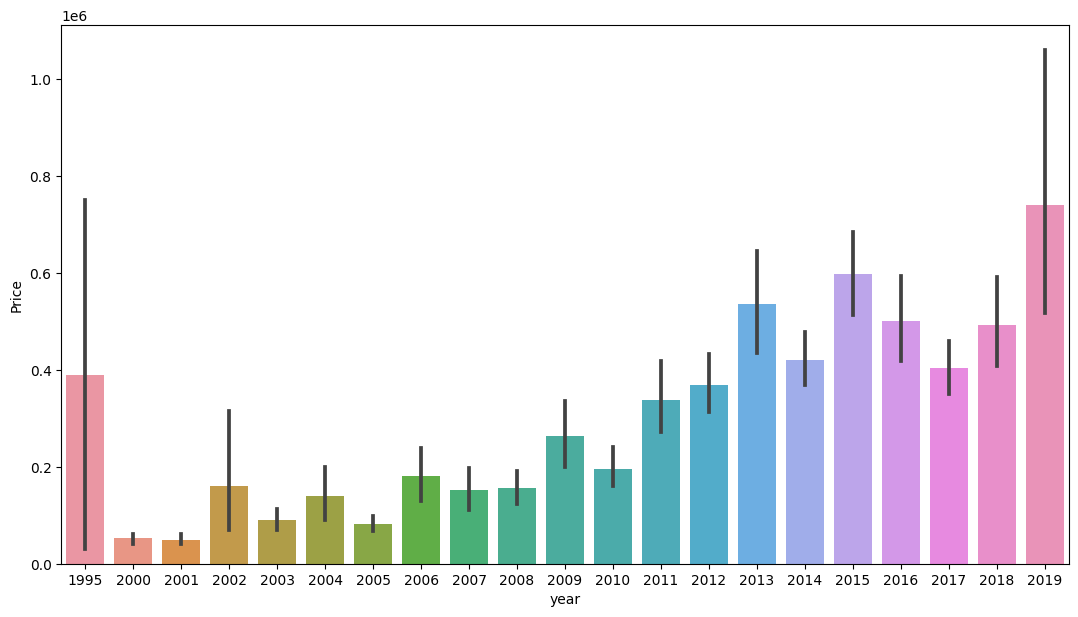

In [157]:
fig = plt.figure(figsize =(13, 7))
sns.barplot(cars,x='year',y='Price')
plt.show()

# Checking relationship of kms_driven with Price

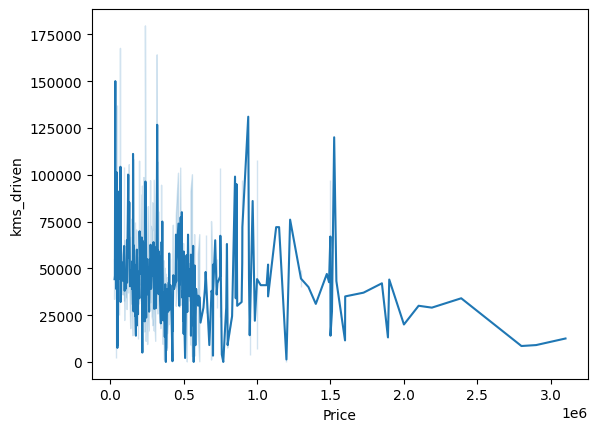

In [158]:
sns.lineplot(cars,x='Price',y='kms_driven')
plt.show()

# Checking relationship of Fuel Type with Price

<Axes: xlabel='fuel_type', ylabel='Price'>

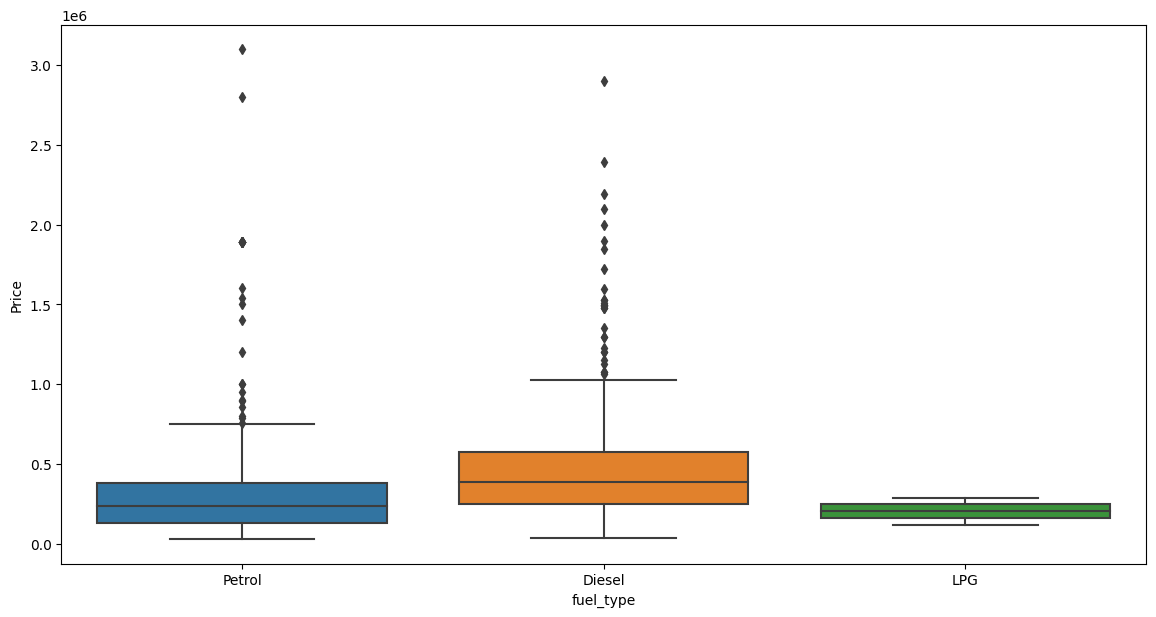

In [159]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=cars)

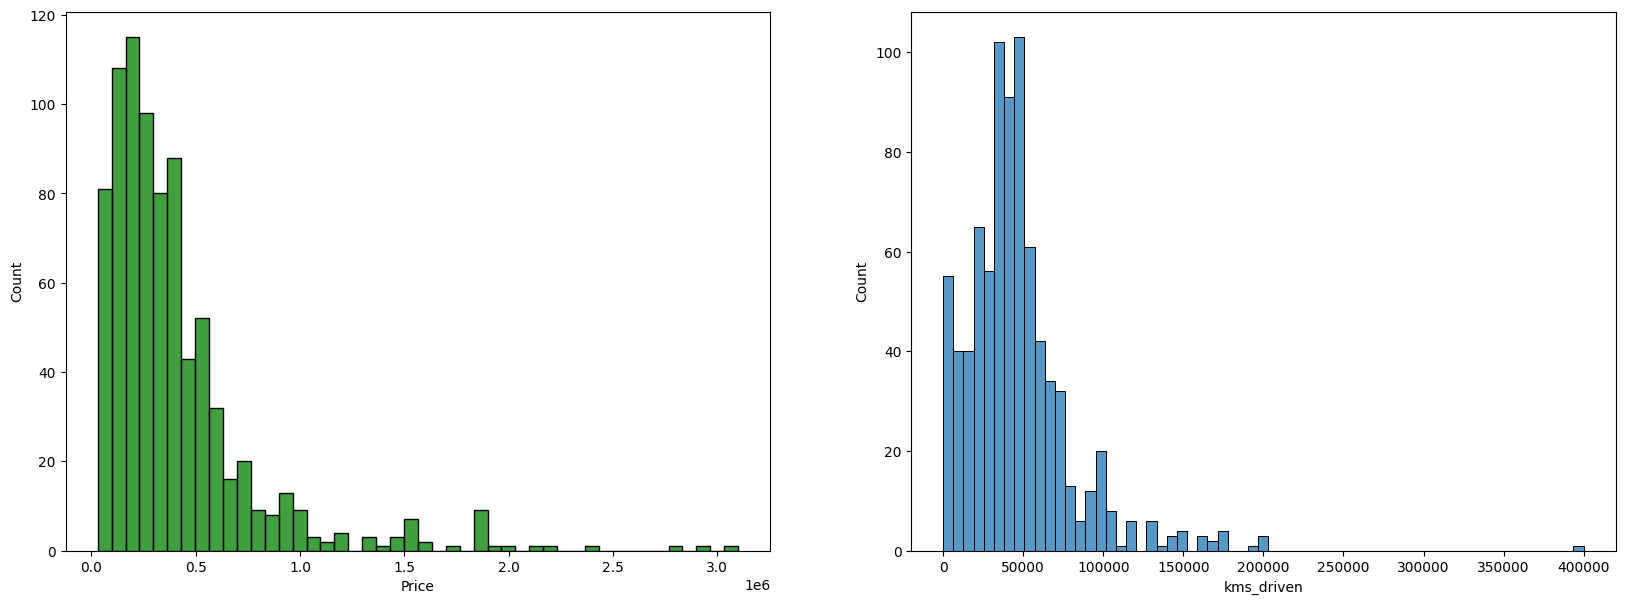

In [160]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))
sns.histplot(cars.Price, ax=ax[0], color='g')
sns.histplot(cars.kms_driven, ax=ax[1])
plt.show()

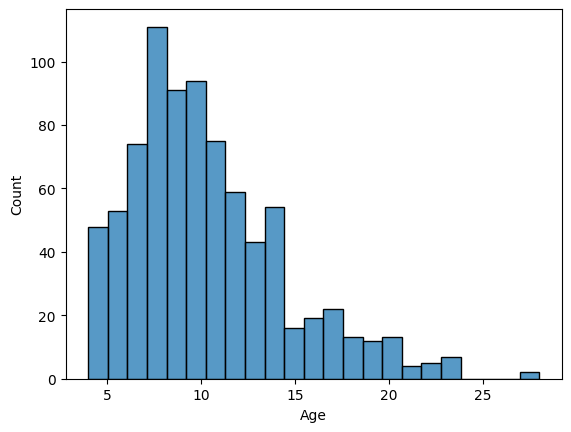

In [161]:
sns.histplot(cars['Age'])
plt.show()

In [162]:
#cars['Price']=np.log10(cars['Price'])
#cars['kms_driven']=np.log10(cars['kms_driven'])
#cars['Age']=np.log10(cars['Age'])

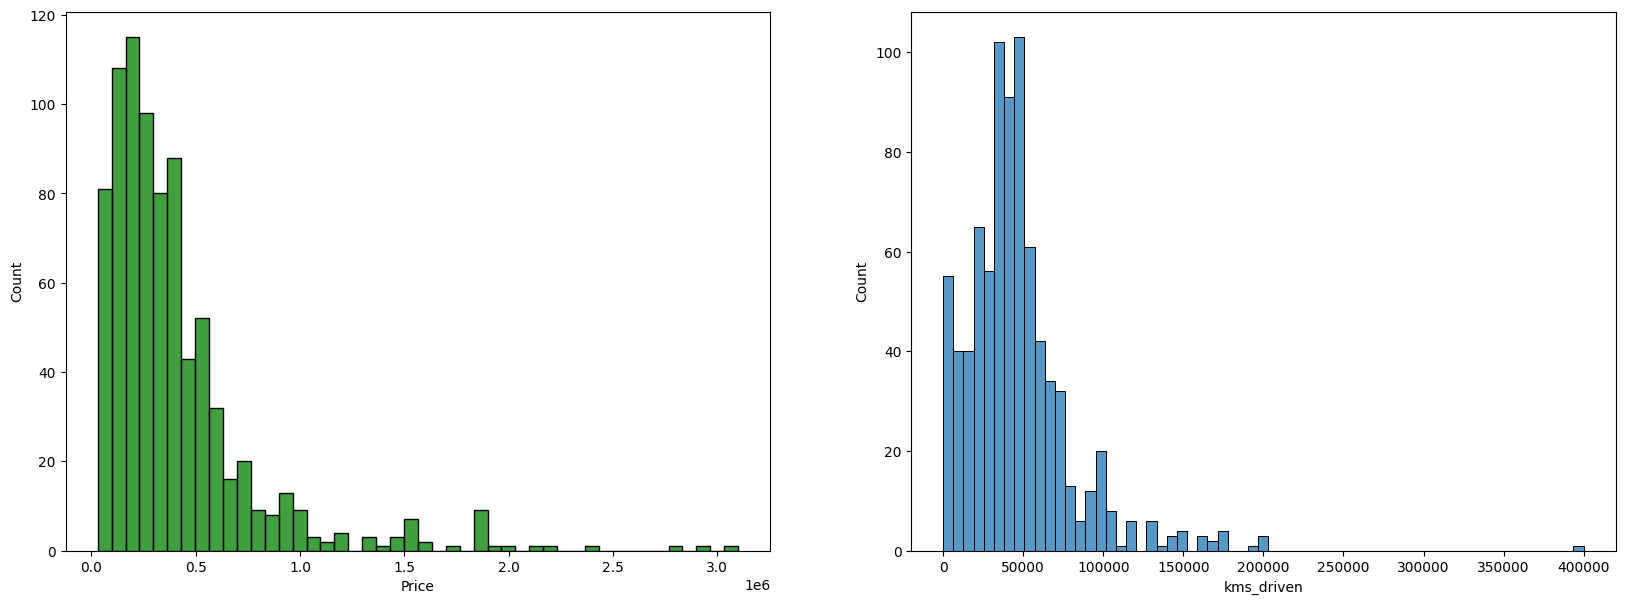

In [163]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))
sns.histplot(cars.Price, ax=ax[0], color='g')
sns.histplot(cars.kms_driven, ax=ax[1])
plt.show()

In [164]:
cars.head()

,name,company,year,Price,kms_driven,fuel_type,Age
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol,16
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel,17
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol,9
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel,9
4,Ford Figo,Ford,2012,175000,41000,Diesel,11


In [165]:
#fig, ax = plt.subplots(1, 2, figsize= (20, 7))
#sns.histplot(cars.Price, ax=ax[0], color='g')
#sns.histplot(cars.kms_driven, ax=ax[1])
#plt.show()

In [166]:
cars = cars.round({"Price":3,"kms_driven":3})

In [167]:
cars

,name,company,year,Price,kms_driven,fuel_type,Age
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol,16
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel,17
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol,9
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel,9
4,Ford Figo,Ford,2012,175000,41000,Diesel,11
...,...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol,12
812,Tata Indica V2,Tata,2009,110000,30000,Diesel,14
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol,14
814,Tata Zest XM,Tata,2018,260000,27000,Diesel,5


In [168]:
columns_to_scale = cars[['Price','kms_driven','Age']]

In [169]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 815 entries, 0 to 815
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        815 non-null    object
 1   company     815 non-null    object
 2   year        815 non-null    int64 
 3   Price       815 non-null    int32 
 4   kms_driven  815 non-null    int64 
 5   fuel_type   815 non-null    object
 6   Age         815 non-null    int64 
dtypes: int32(1), int64(3), object(3)
memory usage: 47.8+ KB


In [170]:
np.any(np.isnan(cars['Price']))

False

In [171]:
cars=cars[~cars.isin([np.nan, np.inf, -np.inf]).any(axis=1)]

In [172]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for i in columns_to_scale:
    cars[i] = scaler.fit_transform(cars[[i]])
cars.head()

,name,company,year,Price,kms_driven,fuel_type,Age
0,Hyundai Santro Xing,Hyundai,2007,0.016287,0.1125,Petrol,0.500000
1,Mahindra Jeep CL550,Mahindra,2006,0.128664,0.0001,Diesel,0.541667
2,Hyundai Grand i10,Hyundai,2014,0.096091,0.0700,Petrol,0.208333
3,Ford EcoSport Titanium,Ford,2014,0.177524,0.0900,Diesel,0.208333
4,Ford Figo,Ford,2012,0.047231,0.1025,Diesel,0.291667


In [173]:
cars.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type,Age
count,815,815,815.000000,815.000000,815.000000,815,815.000000
unique,254,25,NaN,NaN,NaN,3,NaN
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol,NaN
freq,51,221,NaN,NaN,NaN,428,NaN
mean,NaN,NaN,2012.442945,0.121105,0.115693,NaN,0.273211
std,NaN,NaN,4.005079,0.124296,0.085796,NaN,0.166878
min,NaN,NaN,1995.000000,0.000000,0.000000,NaN,0.000000
25%,NaN,NaN,2010.000000,0.047231,0.067500,NaN,0.166667
50%,NaN,NaN,2013.000000,0.087948,0.102500,NaN,0.250000
75%,NaN,NaN,2015.000000,0.149837,0.142198,NaN,0.375000


In [174]:
dummies = pd.get_dummies(cars['company'],dtype=int)
cars = pd.concat([cars, dummies], axis=1)

In [175]:
dummies_1 = pd.get_dummies(cars['fuel_type'],dtype=int)
cars = pd.concat([cars, dummies_1], axis=1)

In [176]:
cars.head()

,name,company,year,Price,kms_driven,fuel_type,Age,Audi,BMW,Chevrolet,...,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo,Diesel,LPG,Petrol
0,Hyundai Santro Xing,Hyundai,2007,0.016287,0.1125,Petrol,0.500000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Mahindra Jeep CL550,Mahindra,2006,0.128664,0.0001,Diesel,0.541667,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Hyundai Grand i10,Hyundai,2014,0.096091,0.0700,Petrol,0.208333,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Ford EcoSport Titanium,Ford,2014,0.177524,0.0900,Diesel,0.208333,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Ford Figo,Ford,2012,0.047231,0.1025,Diesel,0.291667,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [177]:
cars.drop(columns=['year','name','company','fuel_type'],axis=1,inplace=True)

In [178]:
y=cars.pop('Price')
x=cars

In [179]:
#from sklearn.preprocessing import OneHotEncoder


In [180]:
#cars.drop(columns=['name','company','fuel_type','year'],axis=1,inplace=True)

In [181]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [182]:
#column_trans.fit(x_train)

In [183]:
#X_train=pd.DataFrame(column_trans.transform(x_train))
#X_train

In [184]:
#X_test=pd.DataFrame(column_trans.transform(x_test))
#X_test


In [185]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()

In [186]:
x_train.head()

,kms_driven,Age,Audi,BMW,Chevrolet,Datsun,Fiat,Force,Ford,Hindustan,...,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo,Diesel,LPG,Petrol
323,0.095000,0.291667,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
132,0.050000,0.541667,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
381,0.102500,0.708333,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
265,0.075000,0.250000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
443,0.108055,0.166667,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [187]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570 entries, 323 to 102
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   kms_driven  570 non-null    float64
 1   Age         570 non-null    float64
 2   Audi        570 non-null    int32  
 3   BMW         570 non-null    int32  
 4   Chevrolet   570 non-null    int32  
 5   Datsun      570 non-null    int32  
 6   Fiat        570 non-null    int32  
 7   Force       570 non-null    int32  
 8   Ford        570 non-null    int32  
 9   Hindustan   570 non-null    int32  
 10  Honda       570 non-null    int32  
 11  Hyundai     570 non-null    int32  
 12  Jaguar      570 non-null    int32  
 13  Jeep        570 non-null    int32  
 14  Land        570 non-null    int32  
 15  Mahindra    570 non-null    int32  
 16  Maruti      570 non-null    int32  
 17  Mercedes    570 non-null    int32  
 18  Mini        570 non-null    int32  
 19  Mitsubishi  570 non-null    int3

In [188]:
lr.fit(x_train,y_train)

LinearRegression()

In [189]:
y_pred=lr.predict(x_test)

In [190]:
r2_score(y_test,y_pred)

0.6432244539363967